In [55]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, measure
from scipy import ndimage

In [7]:
mask = np.load('mask.npy')
mask.shape
mask[mask != 0] = 1

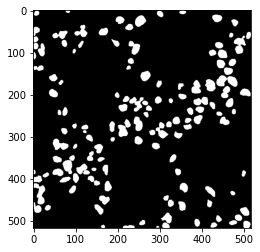

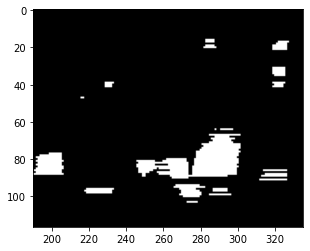

In [11]:
plt.imshow(mask[90], cmap='gray'); plt.show();
plt.imshow(mask[:,250,:], cmap='gray'); plt.xlim([190,335]);plt.show();

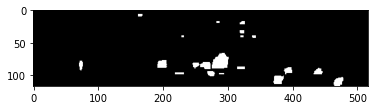

In [18]:
massk = mask.copy()
massk = ndimage.median_filter(massk, size=(5,1,1))
plt.imshow(massk[:,250,:], cmap='gray'); #plt.xlim([190,335]);plt.show();

In [21]:
io.imsave('mask_median.tif', massk)

/opt/homebrew/anaconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: mask_median.tif is a low contrast image
  """Entry point for launching an IPython kernel.


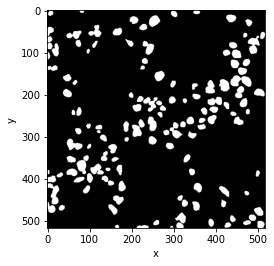

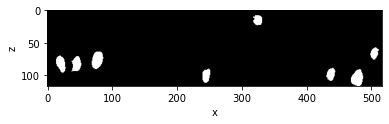

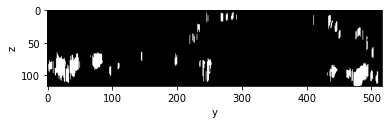

In [50]:
mask_XY = np.load('mask_XY.npy')
mask_XZ = np.load('mask_XZ.npy')
mask_YZ = np.load('mask_YZ.npy')

masks = [mask_XY, mask_XZ, mask_YZ]
for mask in masks:
    mask[mask != 0] = 1
    mask.astype(bool)

plt.imshow(masks[0][90], cmap='gray');plt.xlabel('x');plt.ylabel('y'); plt.show();
plt.imshow(masks[1][:,90], cmap='gray');plt.xlabel('x');plt.ylabel('z'); plt.show();
plt.imshow(masks[2][:,90], cmap='gray');plt.xlabel('y');plt.ylabel('z'); plt.show();

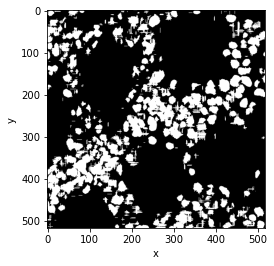

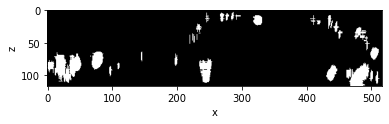

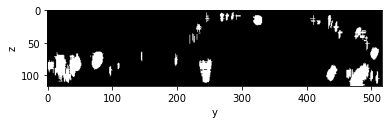

In [58]:
mask_3d = mask_XY + mask_XZ + mask_YZ
mask_3d[mask_3d != 0] = 1
# mask_3d = ndimage.median_filter(mask_3d, size=(3,3,3))
plt.imshow(mask_3d[90], cmap='gray');plt.xlabel('x');plt.ylabel('y'); plt.show();
plt.imshow(mask_3d[:,90], cmap='gray');plt.xlabel('x');plt.ylabel('z'); plt.show();
plt.imshow(mask_3d[:,90], cmap='gray');plt.xlabel('y');plt.ylabel('z'); plt.show();

In [54]:
io.imsave('mask_3d_median.tif', mask_3d)

/opt/homebrew/anaconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: mask_3d_median.tif is a low contrast image
  """Entry point for launching an IPython kernel.


199


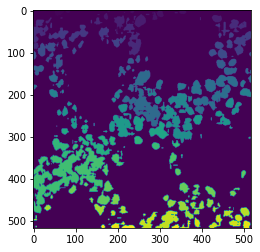

In [57]:
labeled = measure.label(mask_3d[90])
print(labeled.max())
plt.imshow(labeled)